# Result Analysis

In [236]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import datetime

## Open Files

In [237]:
# Open the JSON file

input_data = {}

# path = './../ft_results/vit_b_32_ucmerced_landuse_results.csv'
path = './../ft_results/vit_b_16_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet50_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.csv'
# path = './../ft_results/resnet18_ucmerced_landuse_results.jsonresnet18_ucmerced_landuse_results.csv'

df = pd.read_csv(path)

df.head()

,Experiment,Optimizer,Learning_Rate,Batch_Size,Accuracy,Precision,Recall,F1,Execution_Time,Fold_Number
0,44,AdamW,0.001,32.0,0.750000,0.765867,0.753833,0.751822,1794.489294,4.0
1,31,SGD,0.001,32.0,0.933333,0.931199,0.930867,0.928650,1896.408233,1.0
2,33,SGD,0.001,32.0,0.945238,0.946993,0.944431,0.943251,1891.289057,3.0
3,37,Adam,0.001,32.0,0.754762,0.747948,0.755634,0.744285,1906.500394,2.0
4,39,Adam,0.001,32.0,0.730952,0.748589,0.739435,0.735512,1920.493797,4.0


### Data Shape

In [238]:
num_rows, num_cols = df.shape

print(f'Number of Rows: {num_rows}')
print(f'Number of Cols: {num_cols}')


Number of Rows: 232
Number of Cols: 10


### Single Best Experiment Fold (Accuracy)

In [239]:
max_index = df['Accuracy'].idxmax()


for col in df.columns:
    print(f'{col}: {df[col][max_index]}')

Experiment: 91
Optimizer: SGD
Learning_Rate: 0.0001
Batch_Size: 16.0
Accuracy: 0.9547619047619048
Precision: 0.9564573912399998
Recall: 0.956523962329612
F1: 0.953853105087474
Execution_Time: 2046.2969462871552
Fold_Number: 1.0


### Best Experiment (Combined Folds) (Accuracy)

In [240]:
df_avg = df.groupby(['Optimizer', 'Learning_Rate', 'Batch_Size']).mean().reset_index()

max_acc_idx = df_avg['Accuracy'].idxmax()
max_f1_idx = df_avg['F1'].idxmax()

# print(max_acc_idx)

for col in df_avg.columns:
    print(f'{col}: {df_avg[col][max_f1_idx]}')

# df_avg.head()

Optimizer: SGD
Learning_Rate: 0.0001
Batch_Size: 16.0
Experiment: 66.33333333333333
Accuracy: 0.9365079365079365
Precision: 0.9377295629623948
Recall: 0.9380158463599092
F1: 0.9359861797803055
Execution_Time: 2350.250177886751
Fold_Number: 3.0


### Time Taken for Experiment

In [241]:
df_experiment = df[df['Batch_Size'] == 32]

df_experiment.head()

max_time = df_experiment['Execution_Time'].max()
ave_time = df_experiment['Execution_Time'].mean()

estimated_sequential_time = ave_time * 150 # Use 150 for all experiments

speedup = estimated_sequential_time / max_time

print(f'Max Time: {str(datetime.timedelta(seconds = max_time))}')
print(f'Average Time: {str(datetime.timedelta(seconds = ave_time))}')
print(f'Estimaged Sequential Time: {str(datetime.timedelta(seconds = estimated_sequential_time))}')
print(f'Speedup: {speedup:.2f}')

Max Time: 1:01:58.176639
Average Time: 0:38:08.597203
Estimaged Sequential Time: 3 days, 23:21:29.580387
Speedup: 92.33


### Plot Results

Optimizer	Learning Rate	Accuracy
--------------------------------------------------
Adam	0.0000	0.904
AdamW	0.0000	0.895
SGD	0.0010	0.937
--------------------------------------------------


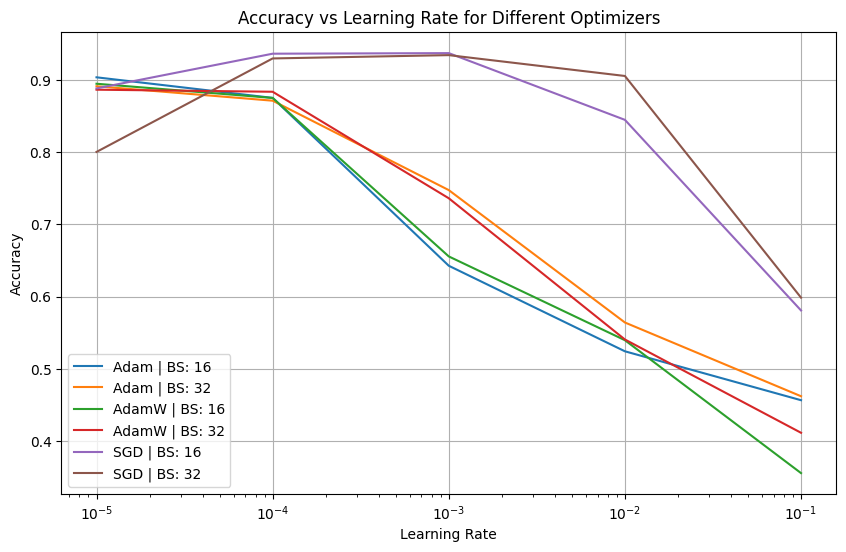

In [242]:
optimizers = df_avg['Optimizer'].unique()
batch_sizes = df_avg['Batch_Size'].unique()

print("Optimizer\tLearning Rate\tAccuracy")
print("-" * 50)

for i, optimizer in enumerate(optimizers):
    optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Batch_Size'] == 16.0)]
    max_acc_idx = optimizer_data['Accuracy'].idxmax()
    max_acc = optimizer_data['Accuracy'][max_acc_idx]
    learning_rate = optimizer_data['Learning_Rate'][max_acc_idx]
    print(f"{optimizer}\t{learning_rate:.4f}\t{max_acc:.3f}")

print("-" * 50)

# Create the plot
plt.figure(figsize=(10, 6))
for optimizer in optimizers:
    for batch_size in batch_sizes:  
        optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Batch_Size'] == batch_size)]
        label = optimizer + ' | BS: ' + str(int(batch_size))
        plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=label)

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()

Optimizer	Learning Rate	Batch Size	Accuracy
--------------------------------------------------------------------------------
Adam	0.0000	16.0	0.904
Adam	0.0000	32.0	0.891
Adam	0.0001	16.0	0.875
Adam	0.0001	32.0	0.871
Adam	0.0010	16.0	0.643
Adam	0.0010	32.0	0.748
Adam	0.0100	16.0	0.524
Adam	0.0100	32.0	0.564
Adam	0.1000	16.0	0.457
Adam	0.1000	32.0	0.462
AdamW	0.0000	16.0	0.895
AdamW	0.0000	32.0	0.887
AdamW	0.0001	16.0	0.875
AdamW	0.0001	32.0	0.884
AdamW	0.0010	16.0	0.656
AdamW	0.0010	32.0	0.736
AdamW	0.0100	16.0	0.540
AdamW	0.0100	32.0	0.541
AdamW	0.1000	16.0	0.356
AdamW	0.1000	32.0	0.412
SGD	0.0000	16.0	0.888
SGD	0.0000	32.0	0.800
SGD	0.0001	16.0	0.937
SGD	0.0001	32.0	0.930
SGD	0.0010	16.0	0.937
SGD	0.0010	32.0	0.935
SGD	0.0100	16.0	0.845
SGD	0.0100	32.0	0.906
SGD	0.1000	16.0	0.581
SGD	0.1000	32.0	0.599
--------------------------------------------------------------------------------


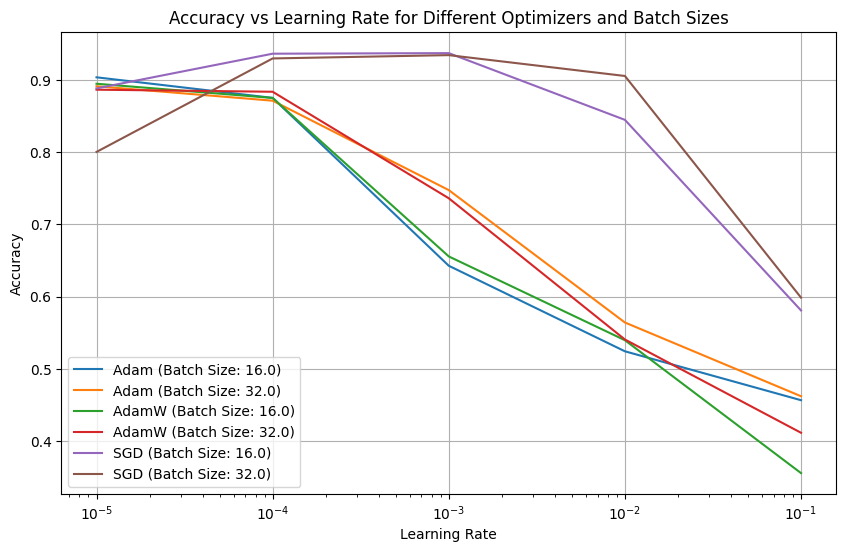

In [243]:

# Assuming your dataframe is already grouped and has the following structure:
# df_avg = df.groupby(['Optimizer', 'Learning_Rate', 'Batch_Size']).mean().reset_index()

# Get the unique optimizers, learning rates, and batch sizes
optimizers = df_avg['Optimizer'].unique()
learning_rates = df_avg['Learning_Rate'].unique()
batch_sizes = df_avg['Batch_Size'].unique()

# Print the values and their corresponding learning rates, batch sizes, and optimizers
print("Optimizer\tLearning Rate\tBatch Size\tAccuracy")
print("-" * 80)

for optimizer in optimizers:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Learning_Rate'] == learning_rate) & (df_avg['Batch_Size'] == batch_size)]
            max_acc_idx = optimizer_data['Accuracy'].idxmax()
            max_acc = optimizer_data['Accuracy'][max_acc_idx]
            print(f"{optimizer}\t{learning_rate:.4f}\t{batch_size}\t{max_acc:.3f}")

print("-" * 80)

# Create the plot
plt.figure(figsize=(10, 6))

for optimizer in optimizers:
    for batch_size in batch_sizes:
        optimizer_data = df_avg[(df_avg['Optimizer'] == optimizer) & (df_avg['Batch_Size'] == batch_size)]
        plt.plot(optimizer_data['Learning_Rate'], optimizer_data['Accuracy'], label=f"{optimizer} (Batch Size: {batch_size})")

plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Learning Rate for Different Optimizers and Batch Sizes')
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.legend()
plt.grid()
plt.show()